# Module 5 week 5

* Clothes designing using AutoEncoders

In [4]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

# Define a transform to normalize the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Download and load the training data
trainset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('~/.pytorch/F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)


In [5]:
class Autoencoder(nn.Module):
    def __init__(self):
        super(Autoencoder, self).__init__()
        
        # Encoder
        self.encoder = nn.Sequential(
            nn.Linear(784, 128),
            nn.ReLU()
        )
        
        # Decoder
        self.decoder = nn.Sequential(
            nn.Linear(128, 784),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.encoder(x)
        x = self.decoder(x)
        return x


In [6]:
def train_autoencoder(autoencoder, trainloader, epochs=10, learning_rate=0.001):
    criterion = nn.MSELoss()
    optimizer = optim.Adam(autoencoder.parameters(), lr=learning_rate)
    
    loss_history = []
    
    for epoch in range(epochs):
        running_loss = 0.0
        
        for data in trainloader:
            inputs, _ = data
            inputs = inputs.view(inputs.size(0), -1)
            
            optimizer.zero_grad()
            
            outputs = autoencoder(inputs)
            loss = criterion(outputs, inputs)
            loss.backward()
            optimizer.step()
            
            running_loss += loss.item()
        
        epoch_loss = running_loss / len(trainloader)
        loss_history.append(epoch_loss)
        
        print(f"Epoch [{epoch+1}/{epochs}], Loss: {epoch_loss}")
    
    return loss_history


Epoch [1/10], Loss: 0.6120045268967715
Epoch [2/10], Loss: 0.5902877014074752
Epoch [3/10], Loss: 0.5860821728640274
Epoch [4/10], Loss: 0.5838913171530278
Epoch [5/10], Loss: 0.5827665035404376
Epoch [6/10], Loss: 0.5821080302505859
Epoch [7/10], Loss: 0.5816461580521517
Epoch [8/10], Loss: 0.5813657025030172
Epoch [9/10], Loss: 0.5811383751536737
Epoch [10/10], Loss: 0.5809811537962224


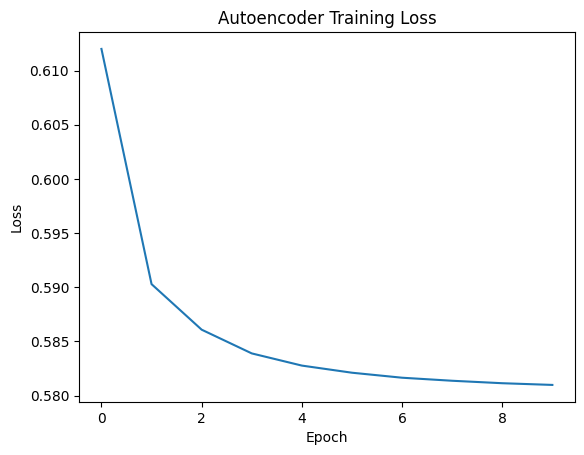

In [7]:
autoencoder = Autoencoder()
loss_history = train_autoencoder(autoencoder, trainloader)

plt.plot(loss_history)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Autoencoder Training Loss')
plt.show()


In [8]:
def generate_clothes(autoencoder, testloader, num_samples=10):
    fig, axes = plt.subplots(num_samples, 2, figsize=(10, 20))
    
    for i, data in enumerate(testloader):
        if i == num_samples:
            break
            
        inputs, labels = data
        inputs = inputs.view(inputs.size(0), -1)
        outputs = autoencoder(inputs)
        
        axes[i, 0].imshow(inputs[0].reshape(28, 28), cmap='gray')
        axes[i, 0].set_title(f"Input: {labels[0]}")
        
        axes[i, 1].imshow(outputs[0].detach().numpy().reshape(28, 28), cmap='gray')
        axes[i, 1].set_title("Autoencoder Output")
        
        axes[i, 0].axis('off')
        axes[i, 1].axis('off')
    
    plt.tight_layout()
    plt.show()


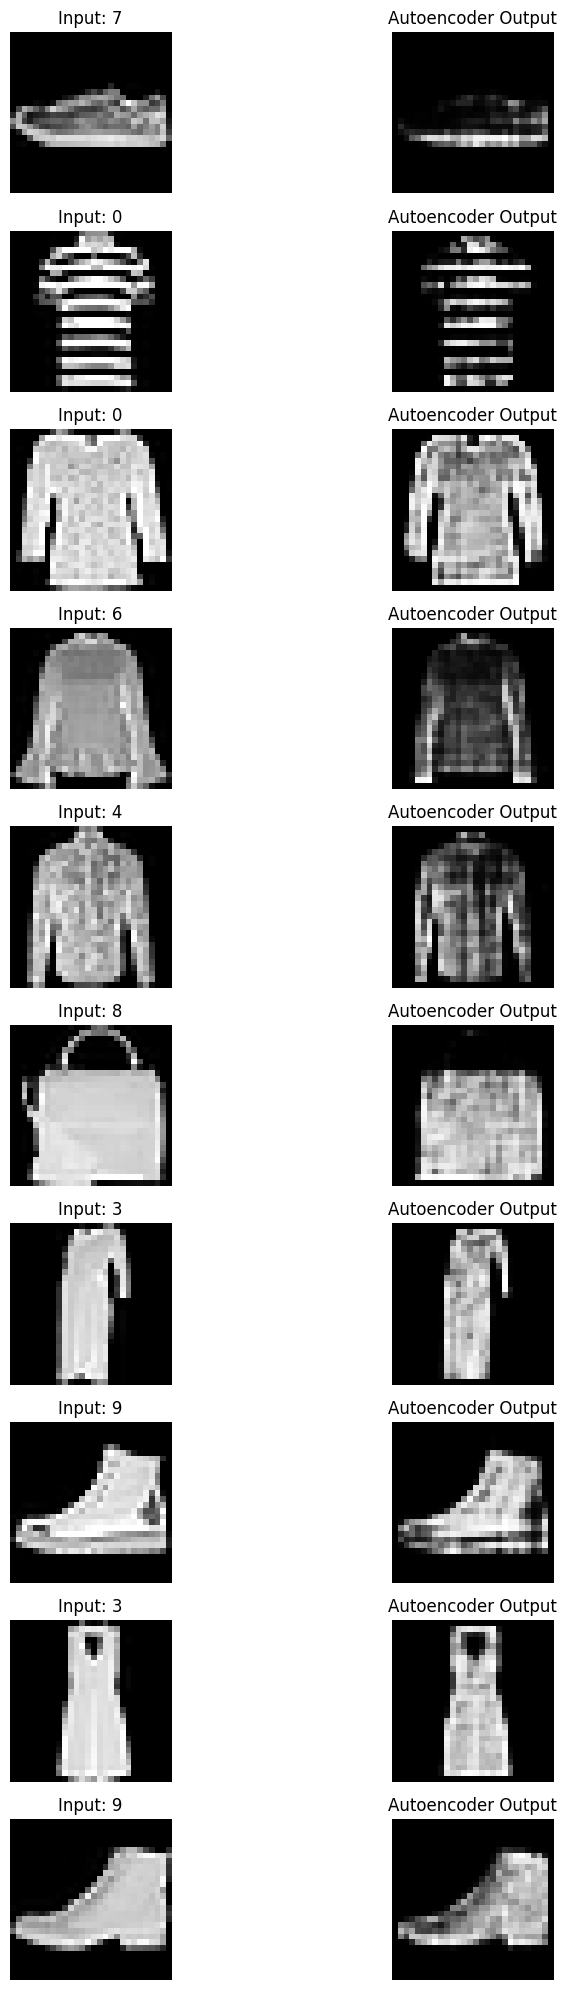

In [9]:
generate_clothes(autoencoder, testloader, num_samples=10)
